## HOMEWORK 2

### 1. Metadata  
This dataset contains comprehensive information on some of the most streamed songs on Spotify, enriched with additional insights from other popular streaming platforms like Apple Music, Deezer, and Shazam.

- **track_name**: Name of the song (categorical).
- **artist(s)_name**: Name of the artist(s) performing the song (categorical).
- **artist_count**: Number of artists contributing to the song (numerical).
- **released_year**: Year of the song’s release (numerical).
- **released_month**: Month of the song’s release (numerical).
- **released_day**: Day of the song’s release (numerical).
- **in_spotify_playlists**: Number of Spotify playlists featuring the song (numerical).
- **in_spotify_charts**: Rank of the song on Spotify charts (numerical).
- **streams**: Total number of streams on Spotify (numerical).
- **in_apple_playlists**: Presence in Apple Music playlists (categorical).
- **in_apple_charts**: Rank of the song on Apple Music charts (numerical).
- **in_deezer_playlists**: Presence in Deezer playlists (numerical).
- **in_deezer_charts**: Rank of the song on Deezer charts (numerical).
- **in_shazam_charts**: Rank of the song on Shazam charts (numerical).
- **bpm**: Beats per minute, representing the song’s tempo (numerical).
- **key**: Musical key of the song (categorical).
- **mode**: Indicates whether the song is in major or minor mode (categorical).
- **danceability_%**: Danceability score of the song (numerical).
- **valence_%**: Positivity score of the song’s musical content (numerical).
- **energy_%**: Perceived energy level of the song (numerical).
- **acousticness_%**: Level of acoustic sound in the song (numerical).
- **instrumentalness_%**: Proportion of instrumental content in the song (numerical).
- **liveness_%**: Presence of live performance elements in the song (numerical).
- **speechiness_%**: Amount of spoken words in the song (numerical).

In [201]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')

In [202]:
# Define the column names as a list
column_names = ['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month',
                'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams',
                'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
                'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
                'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                'instrumentalness_%', 'liveness_%', 'speechiness_%']


### 2. Load Dataset

In [203]:
dataset = pd.read_csv("Spotify Most Streamed Songs.csv", sep = ",", skipinitialspace=True)
dataset

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found


In [204]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  953
#Features =  25


In [205]:
# Converting columns that should be numeric but are string
dataset['streams'] = pd.to_numeric(dataset['streams'], errors='coerce')
dataset['in_deezer_playlists'] = pd.to_numeric(dataset['in_deezer_playlists'], errors='coerce')
dataset['in_shazam_charts'] = pd.to_numeric(dataset['in_shazam_charts'], errors='coerce')

# Let's check if there are any missing values in the data
missing_values = dataset.isnull().sum()
missing_values

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,1
in_apple_playlists,0


In [206]:
rows_with_missing = dataset[dataset.isnull().any(axis=1)]
rows_with_missing

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1.316856e+09,300,...,NaN,Major,71,65,68,6,0,3,7,https://i.scdn.co/image/ab67616d0000b27358039b...
13,Daylight,David Kushner,1,2023,4,14,3528,98,3.875707e+08,80,...,D,Minor,51,32,43,83,0,9,3,https://i.scdn.co/image/ab67616d0000b27395ca6a...
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2.513188e+09,403,...,F#,Minor,52,66,73,34,0,31,6,https://i.scdn.co/image/ab67616d0000b2732e8ed7...
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,3.054688e+07,80,...,NaN,Major,44,14,9,96,0,10,3,Not Found
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1.297026e+09,24,...,NaN,Minor,48,44,42,12,2,11,3,https://i.scdn.co/image/ab67616d0000b2734ae1c4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,5153,6,2.445851e+08,102,...,NaN,Major,74,71,89,24,61,15,5,Not Found
910,The Scientist,Coldplay,1,2002,8,5,30992,6,1.608164e+09,124,...,F,Major,56,21,44,73,0,11,2,https://i.scdn.co/image/ab67616d0000b273de09e0...
927,I Really Want to Stay at Your House,"Rosa Walton, Hallie Coggins",2,2020,12,18,668,1,1.404303e+08,0,...,D#,Minor,49,13,74,0,0,9,4,https://i.scdn.co/image/ab67616d0000b273a91a5b...
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,1.873398e+08,6,...,NaN,Major,48,15,31,80,22,12,4,https://i.scdn.co/image/ab67616d0000b273bb54dd...


Filtering missing values

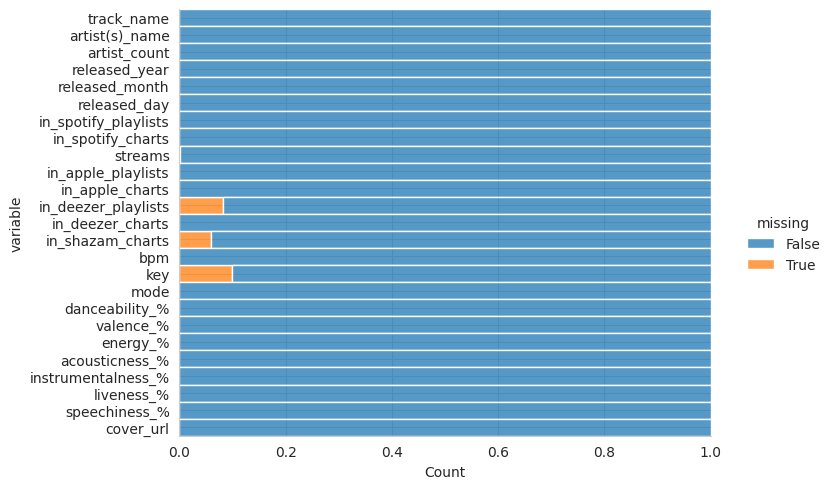

In [207]:
# Plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)
plt.show()

In [208]:
# Replacing missing values in the 'key' column with the 'Unknown' category
dataset['key'] = dataset['key'].fillna("Unknown")
# Replace the missing values with zero, which will mean absence from the chart and playlist
dataset['in_deezer_playlists'] = dataset['in_deezer_playlists'].fillna(0)
dataset['in_shazam_charts'] = dataset['in_shazam_charts'].fillna(0)

Now let's build a graph and make sure that there are no missing values.

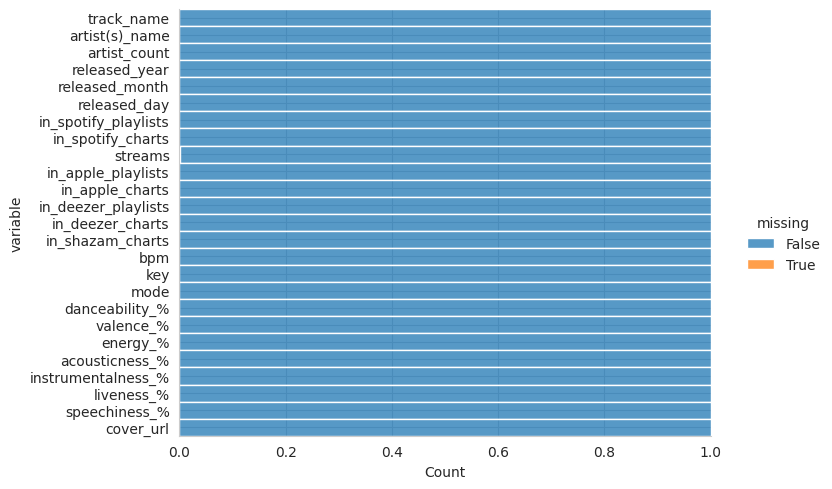

In [209]:
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)
plt.show()

### 3. Descriptive Statistical Analysis

#### Numerical variables

In [210]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

In [211]:
# list of numerical variables
numerical_cols = [
    "artist_count", "released_year", "released_month", "released_day",
    "in_spotify_playlists", "in_spotify_charts", "streams",
    "in_apple_charts", "in_apple_playlists", "in_deezer_playlists", "in_deezer_charts",
    "in_shazam_charts", "bpm", "danceability_%", "valence_%",
    "energy_%", "acousticness_%", "instrumentalness_%",
    "liveness_%", "speechiness_%"
]

Histogram with Frequencies

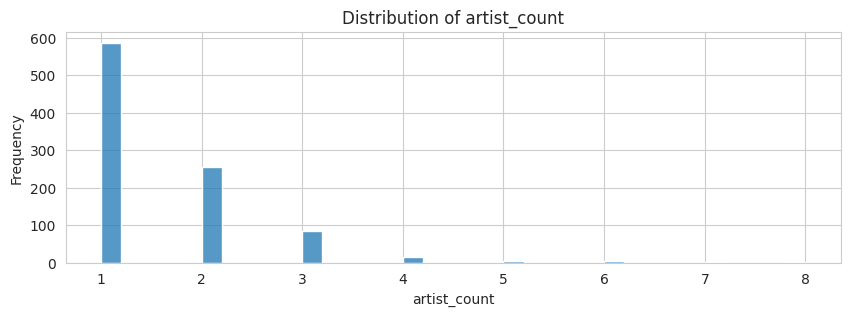

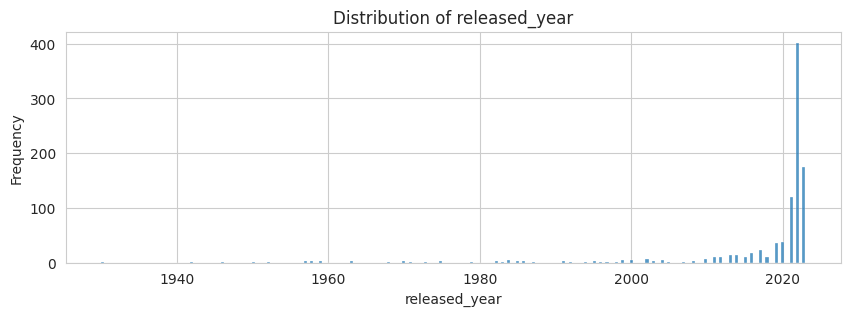

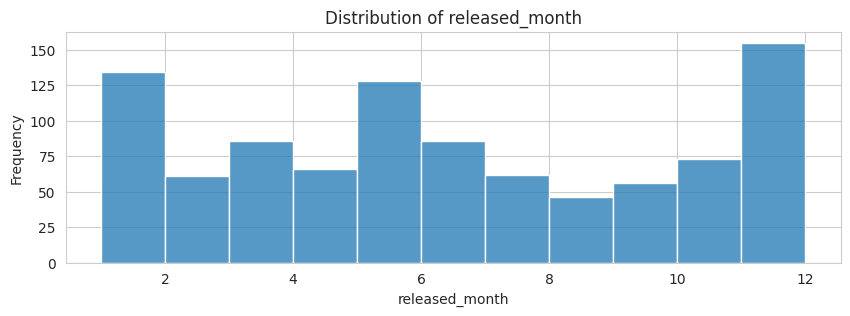

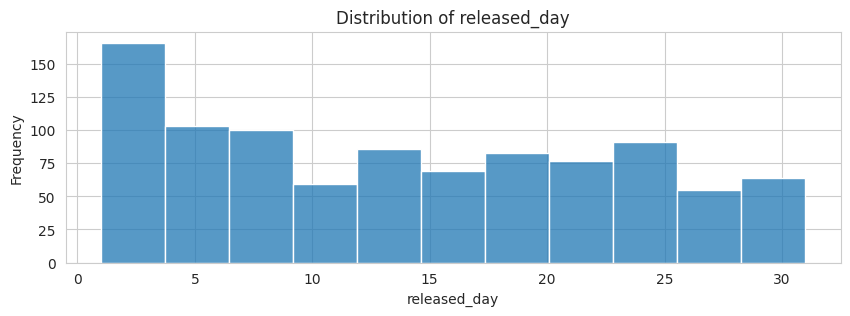

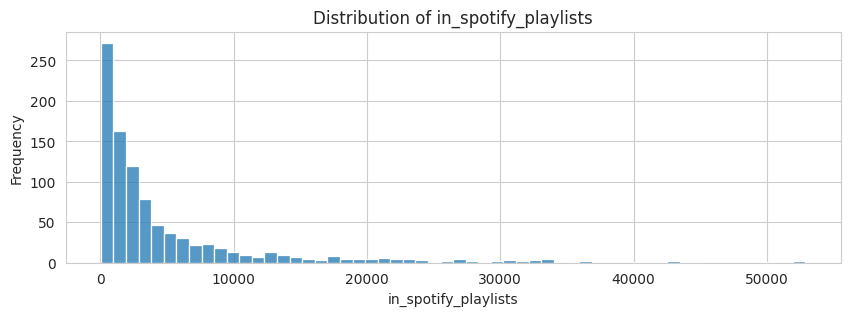

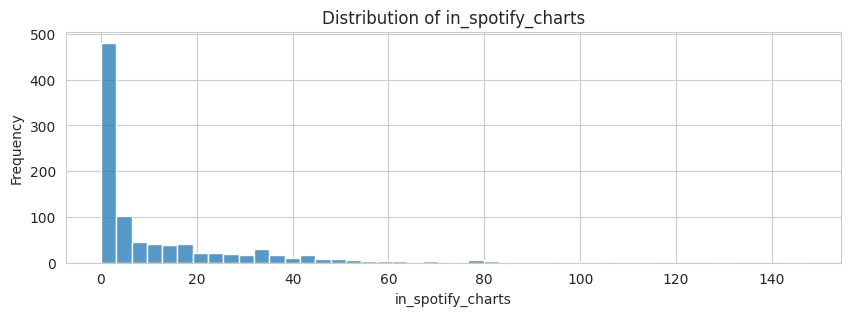

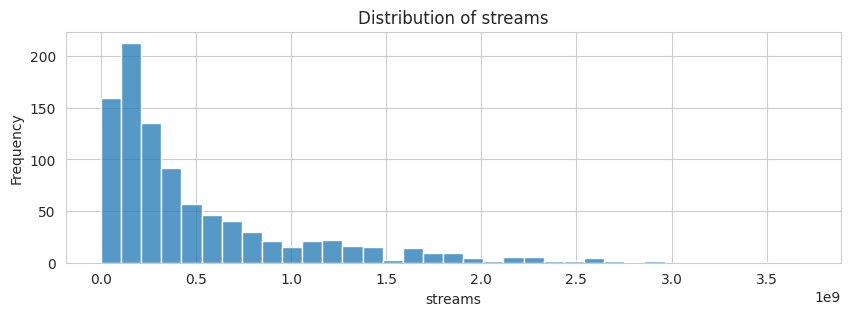

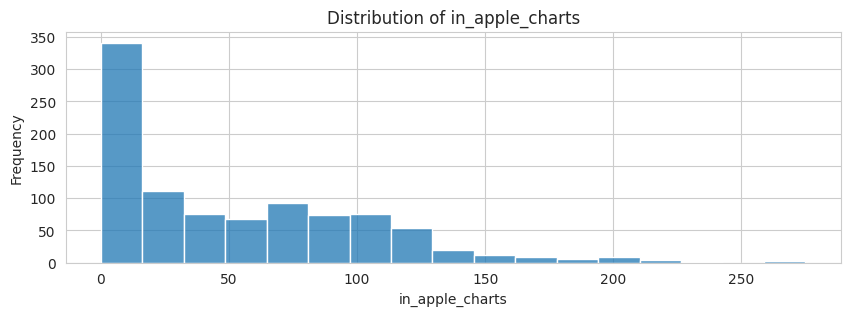

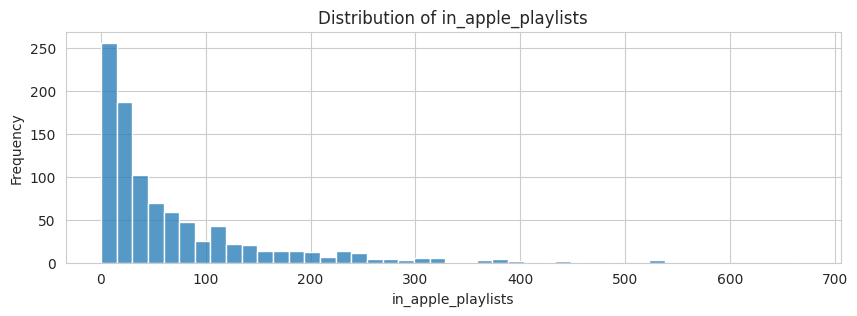

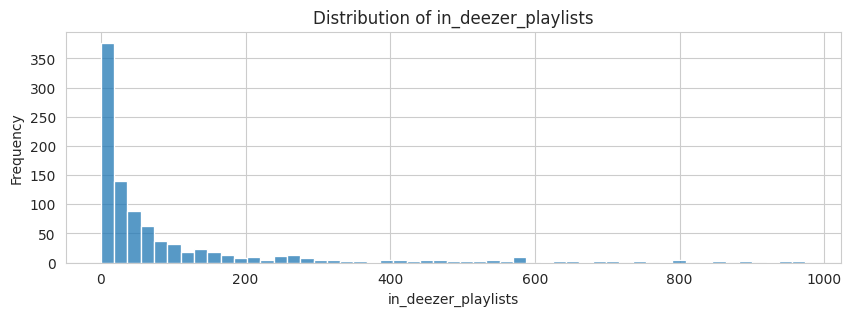

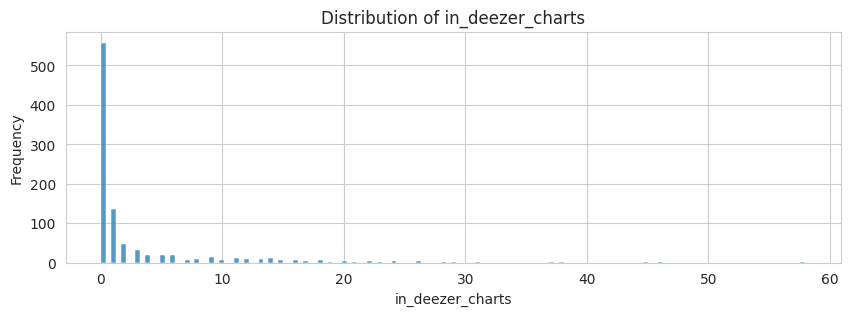

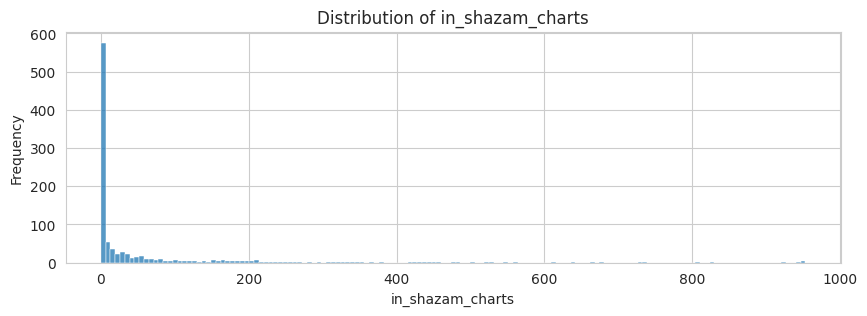

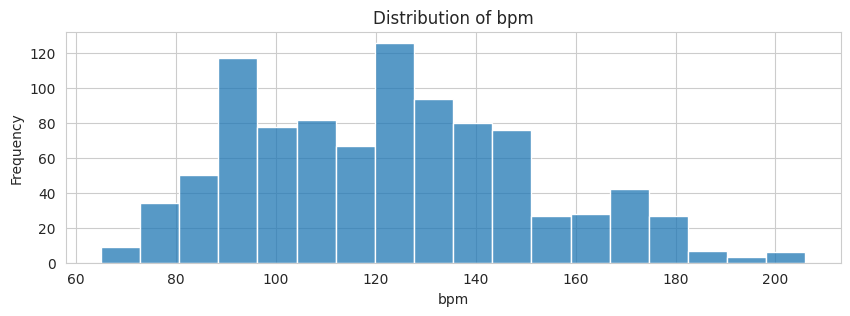

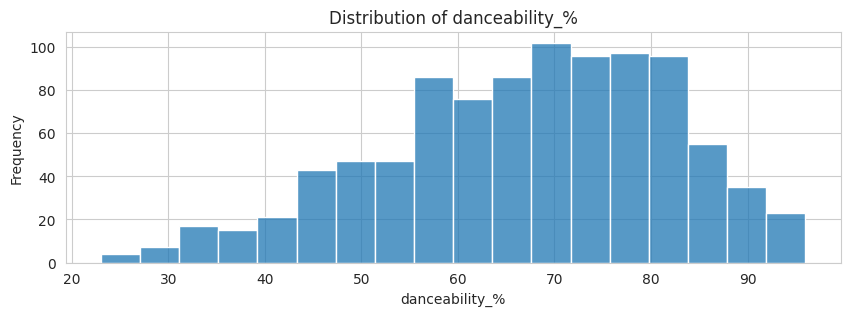

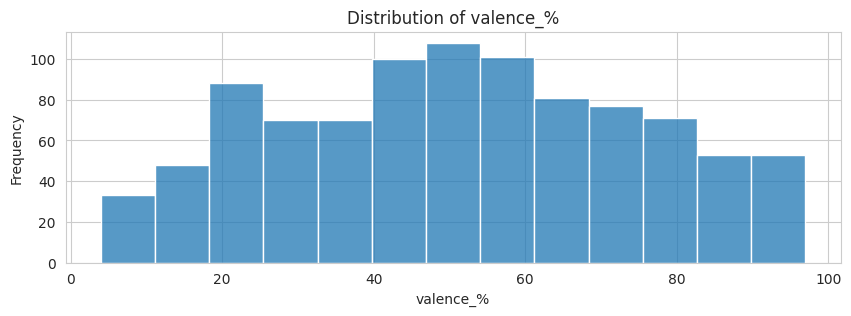

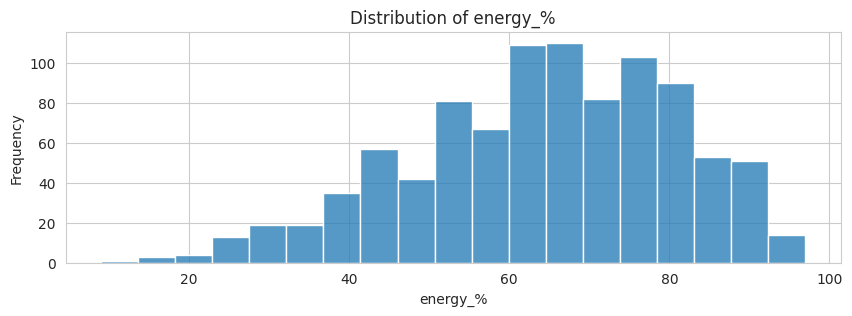

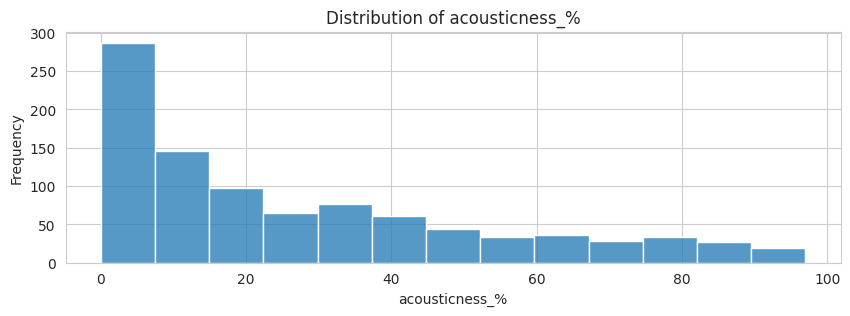

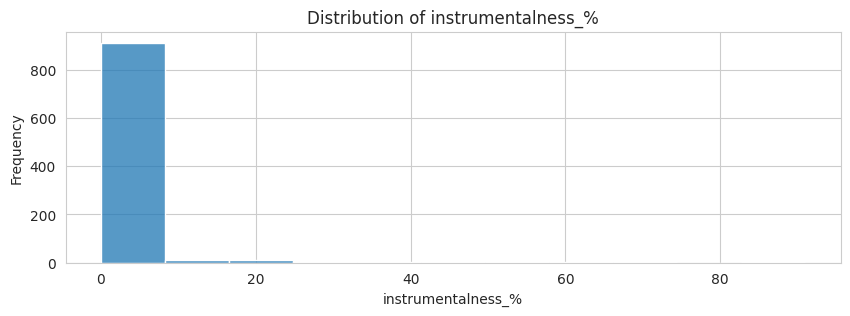

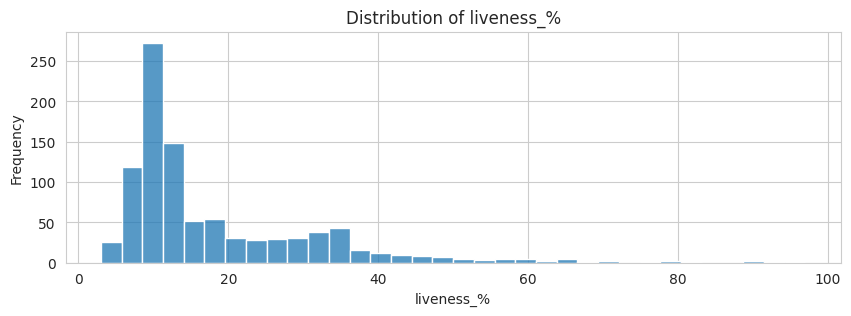

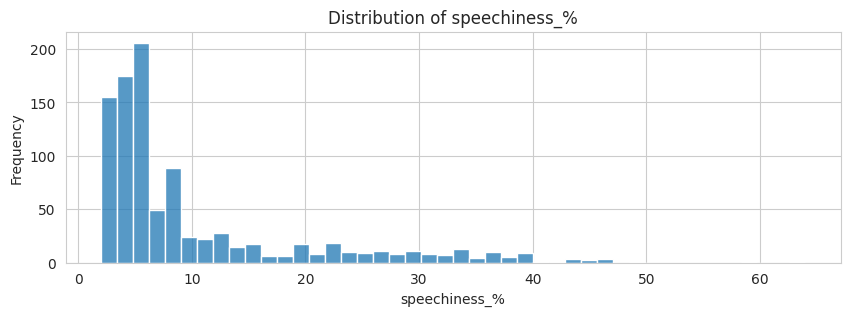

In [212]:
for col in numerical_cols:
    plt.figure(figsize=(10, 3))
    sbn.histplot(dataset[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

- artist_count: Most of the songs are solo.
- released_year: Most of the songs on the chart were released after 2020.
- released_month, released_day: Most of the songs are released in January, May and November at the beginning of the month.
- in_spotify_playlists: Most of the songs in the chart are added to <10,000 playlists.
- in_spotify_charts: The songs were mostly in the top 20.
- Streams: The songs on the chart are listened to mostly up to a billion times.
- in_apple_playlists, in_apple_charts: Songs added to <100 playlists, most of the top 20.
- in_deezer_playlists, in_deezer_charts: Songs added to <200 playlists, most of the top 10.
- in_shazam_charts: Songs were mostly in the top 50.
- bpm: Most songs have between 90 and 12 beats per minute.
- danceability_%: Most of the songs are suitable for dancing on average.
- energy_%: The perceived energy level of the songs is mostly more than 60%.
- acousticness_%: Most songs have a weak presence of acoustic sound.
- instrumentalness_%: The instrumental takes up 10% percent of the songs.
- liveness_%: Most songs contain <20% of live performance elements.
- speechiness_%: Less than 10% of the entire song on the chart are words.

Histogram with Densities and KDE line (kernel density estimate)

In [213]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)
    plt.show()

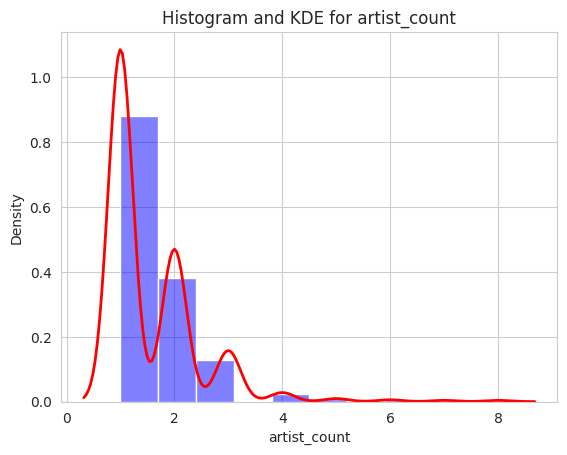

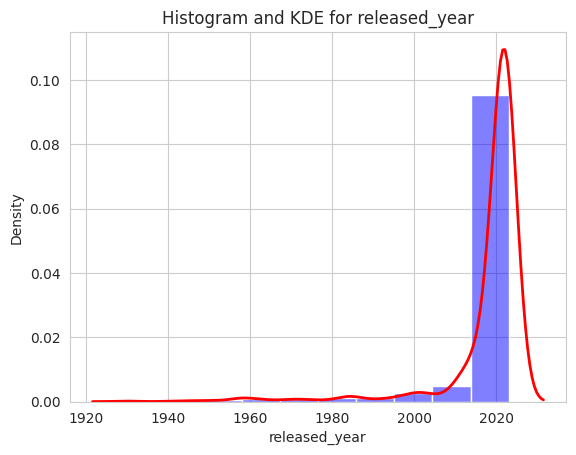

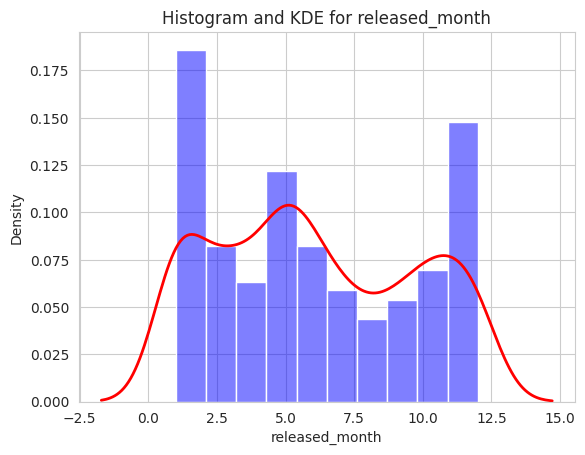

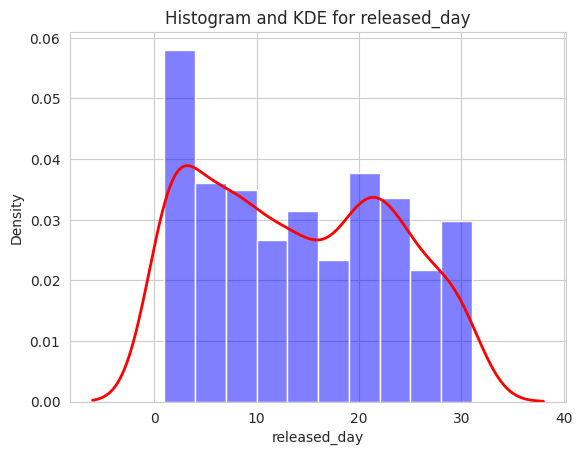

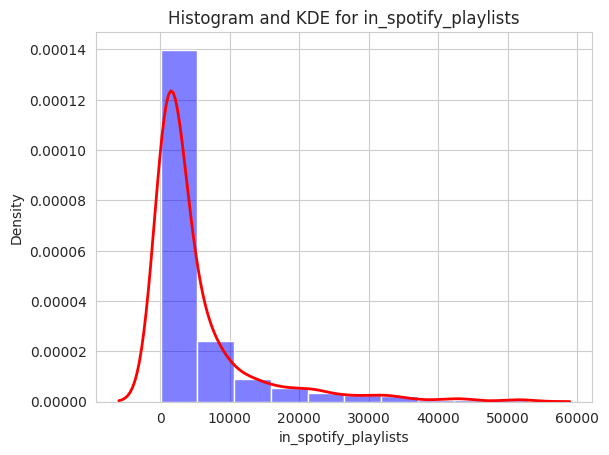

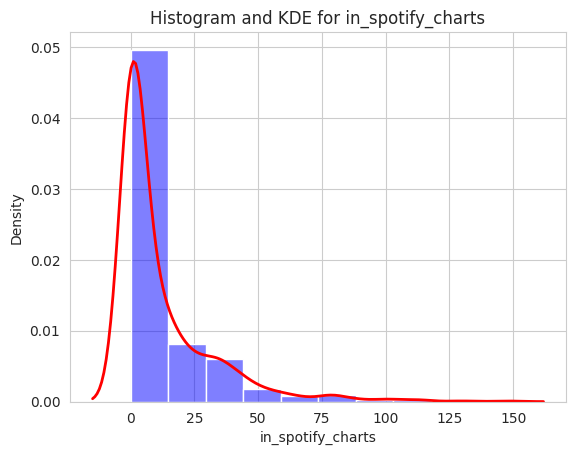

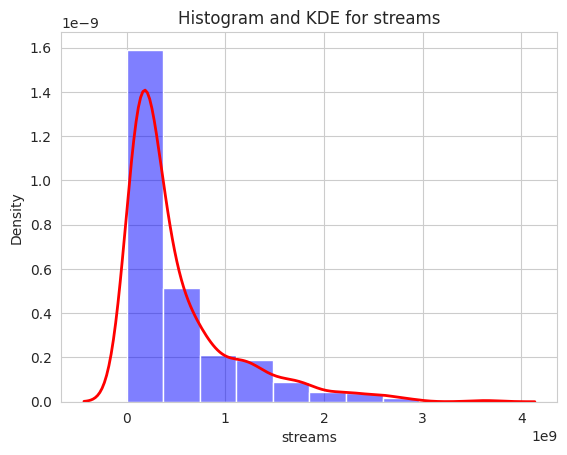

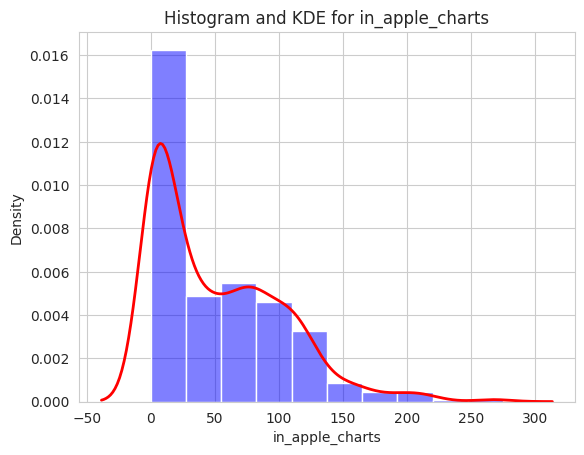

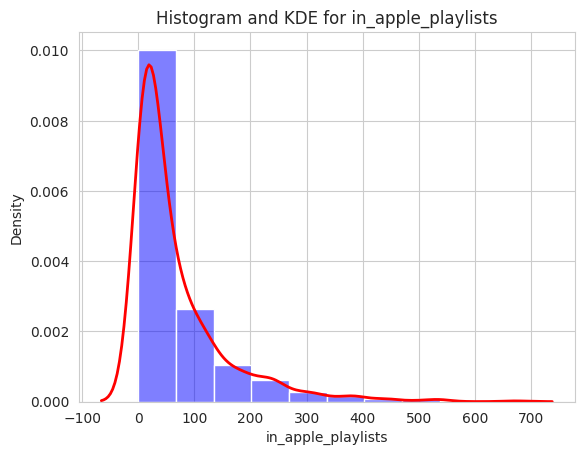

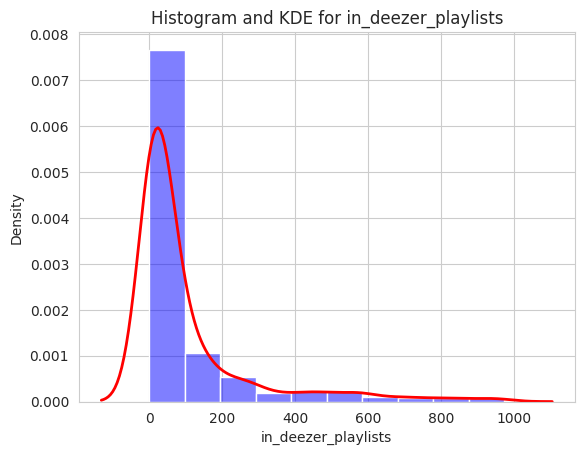

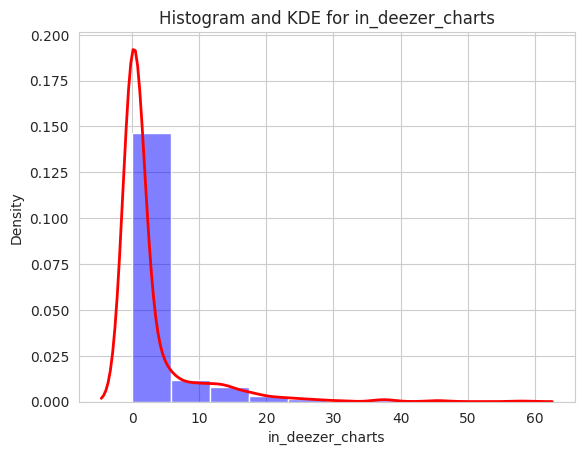

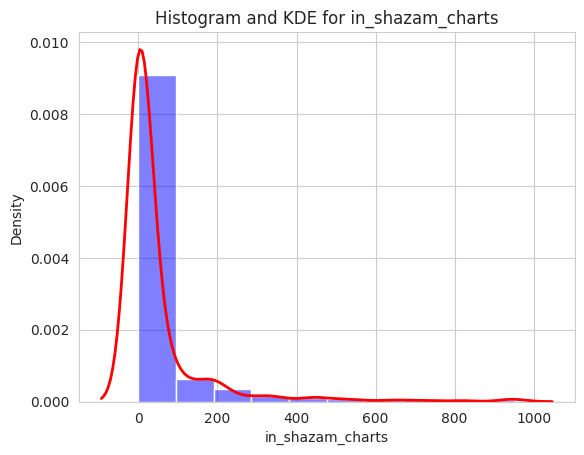

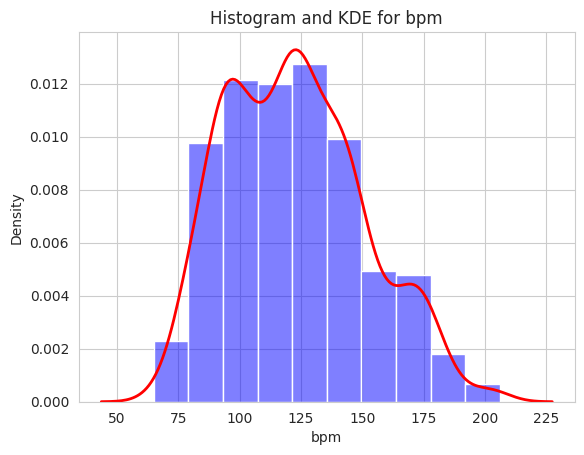

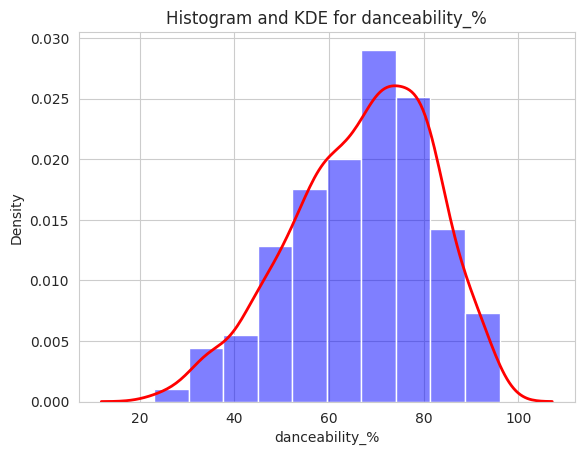

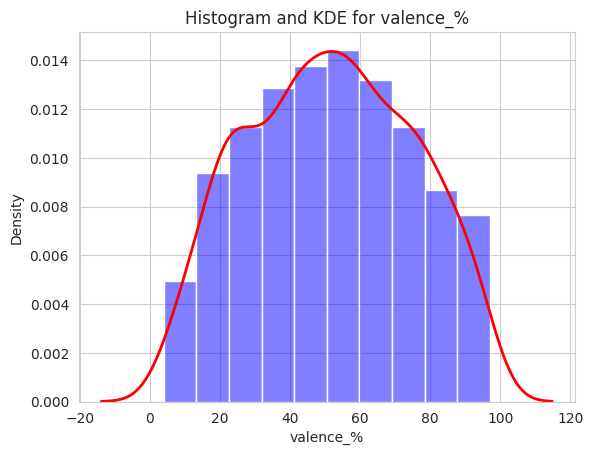

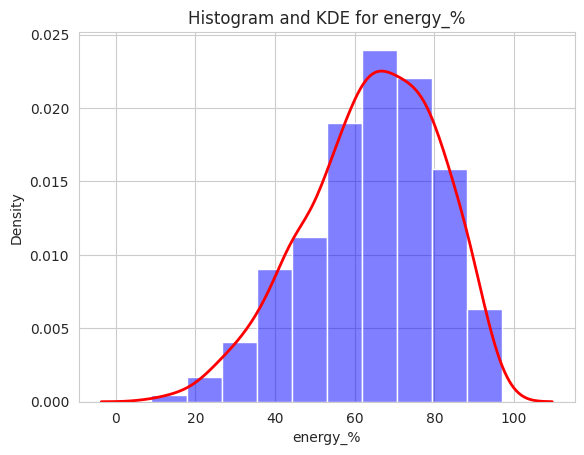

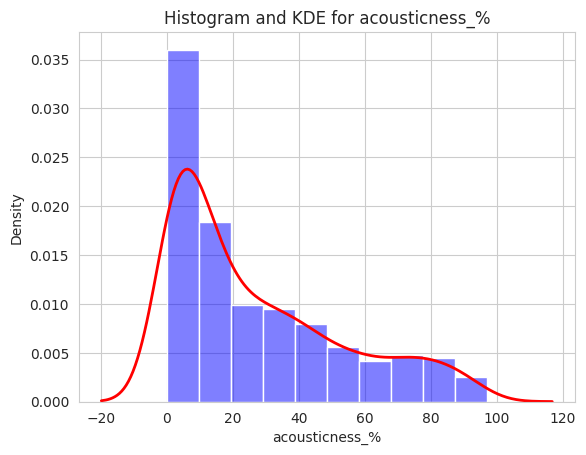

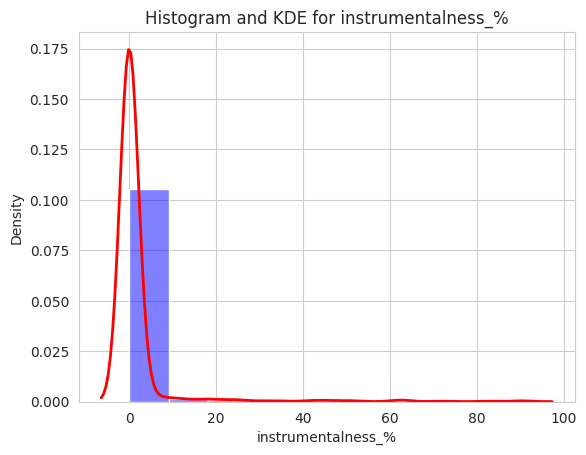

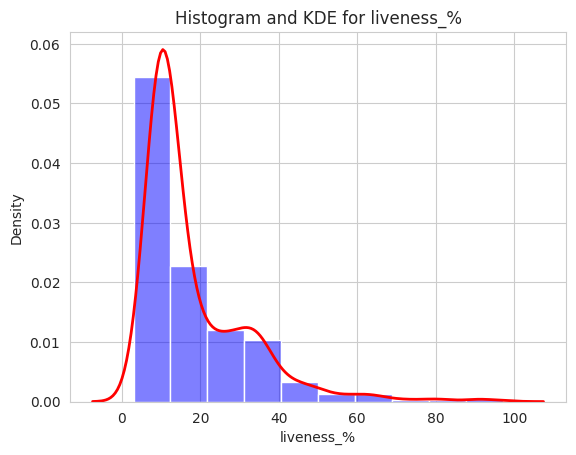

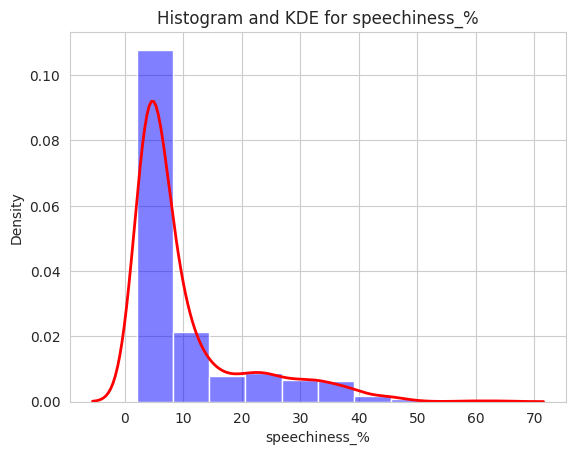

In [214]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

- artist_count: Distribution with right-sided beveling. Most of the values are concentrated on the left, closer to the smaller values (1-2 artists).
- released_year: Left—sided skewed distribution - most of the values are concentrated on higher values (in recent years).
- released_month, released_day: The data is relatively evenly distributed over months and days with several noticeable peaks.
- in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, acousticness_%, instrumentalness_%, liveness_%, speechiness_%: In all these cases, the distribution is right-sided. Most of the values are concentrated on the left, closer to the smaller values.
- bpm: The density graph for the bpm variable shows a bell-shaped normal distribution with a peak of about 120 beats per minute. Most of the data is concentrated in the range from 100 to 140 bpm.
- danceability_%, energy_%, valence_%: For these cases, the density graph also represents a bell-shaped normal distribution.


Box Plot

In [215]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 2
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

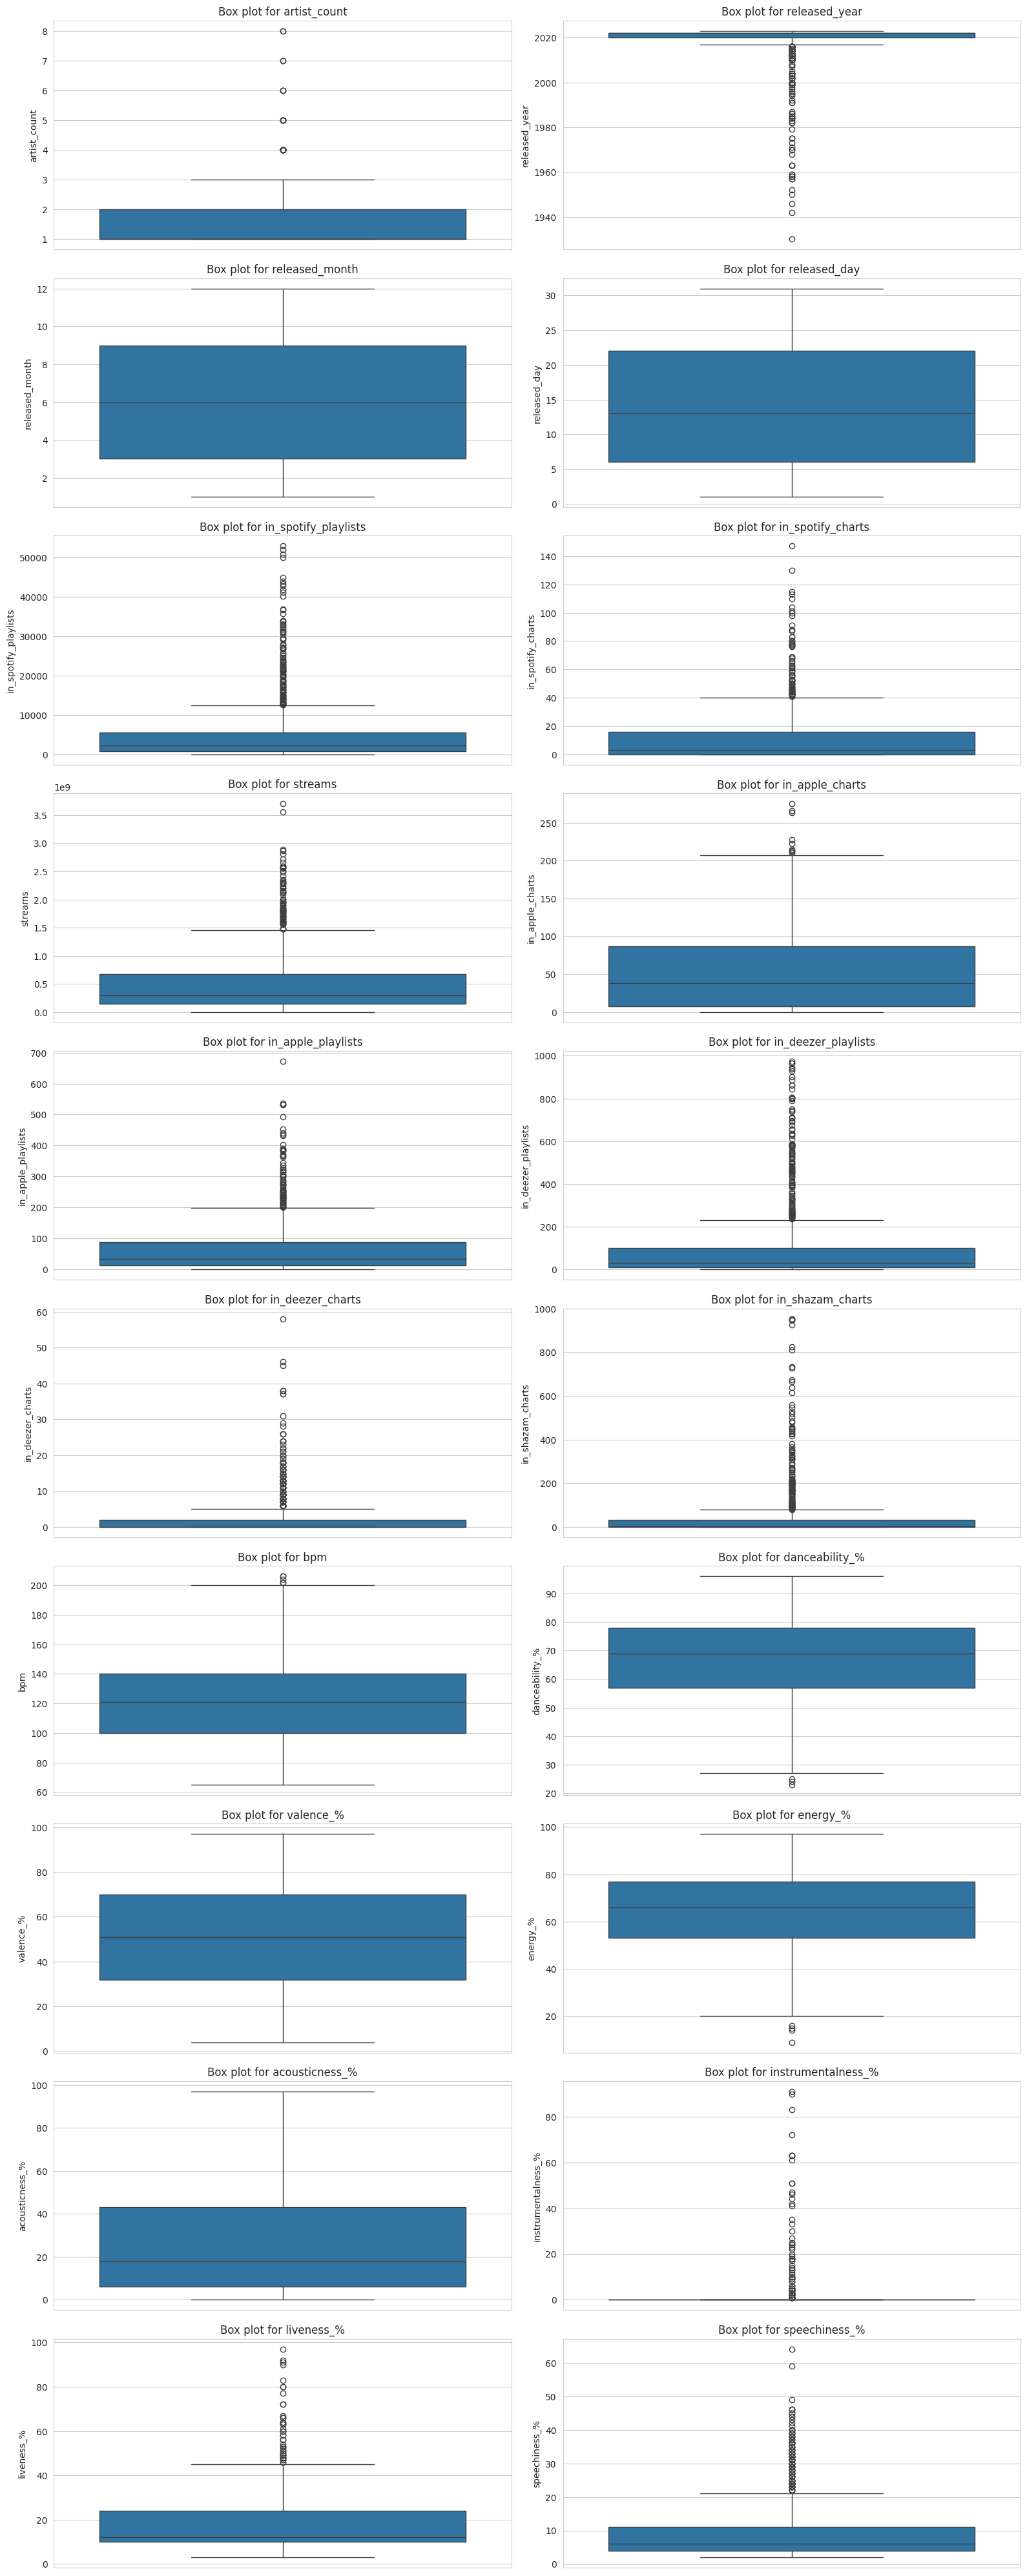

In [216]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

The dots located above the upper limit indicate outliers (values that differ significantly from the bulk of the data). Moreover, a large number of emissions are noticeable on some graphs.

Statistical metrics

In [217]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_charts,in_apple_playlists,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,51.908709,67.812172,100.643232,2.666317,48.115425,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,50.630241,86.441493,173.887239,6.035599,123.242346,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,7.000000,13.000000,9.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,38.000000,34.000000,31.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,87.000000,88.000000,100.000000,2.000000,32.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,275.000000,672.000000,974.000000,58.000000,953.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Correlation Analysis

In [218]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    # Set figure size (width, height)
    plt.figure(figsize=(12, 8))
    plt.matshow(corr, cmap="coolwarm", fignum=1)
    plt.xticks(range(len(cols)), cols, rotation=90)
    plt.yticks(range(len(cols)), cols)
    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

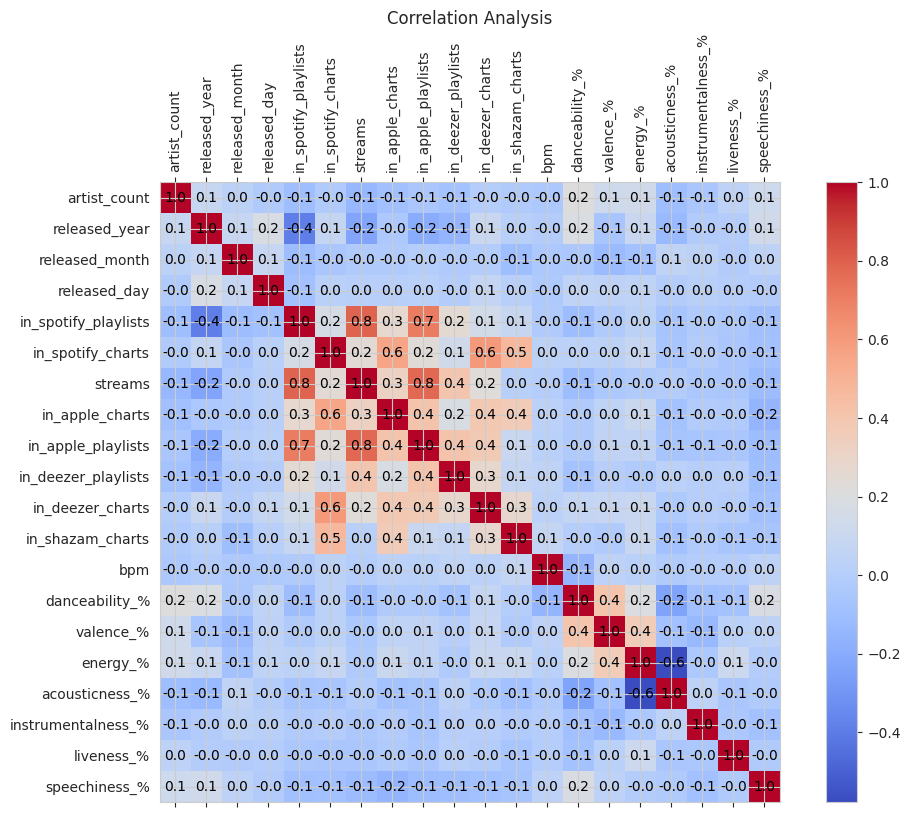

In [219]:
plot_correlation(dataset, numerical_cols)

It is clearly visible that the possibility of getting a song into playlists depends on the number of listenings.You can also notice that if a song hits the Spotify chart, then it is also very likely to hit the Apple and Dezeer charts. The other variables are poorly correlated with each other.

In [220]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile


In [221]:
call_percentile(z = -2)

2.275

In [222]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)

    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]

    return outliers

In [223]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in artist_count ***
#samples outlier to distribution = 12
%outliers = 1.26 %

*** Outliers detection in released_year ***
#samples outlier to distribution = 22
%outliers = 2.31 %

*** Outliers detection in released_month ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in released_day ***
#samples outlier to distribution = 19
%outliers = 1.99 %

*** Outliers detection in in_spotify_playlists ***
#samples outlier to distribution = 44
%outliers = 4.62 %

*** Outliers detection in in_spotify_charts ***
#samples outlier to distribution = 22
%outliers = 2.31 %

*** Outliers detection in streams ***
#samples outlier to distribution = 44
%outliers = 4.62 %

*** Outliers detection in in_apple_charts ***
#samples outlier to distribution = 22
%outliers = 2.31 %

*** Outliers detection in in_apple_playlists ***
#samples outlier to distribution = 21
%outliers = 2.2 %

*** Outliers detection in in_deezer_playlists ***
#samples outlier to dis

#### Categorical Variables

In [224]:
# list of categorical variables
categorical_vars = ['key', 'mode']

Count instances for each categorical column

In [225]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** key ******
key
C#         120
G           96
Unknown     95
G#          91
F           89
B           81
D           81
A           75
F#          73
E           62
A#          57
D#          33
Name: count, dtype: int64

***** mode ******
mode
Major    550
Minor    403
Name: count, dtype: int64


Bar chart - Analysis of absolute frequencies

In [226]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

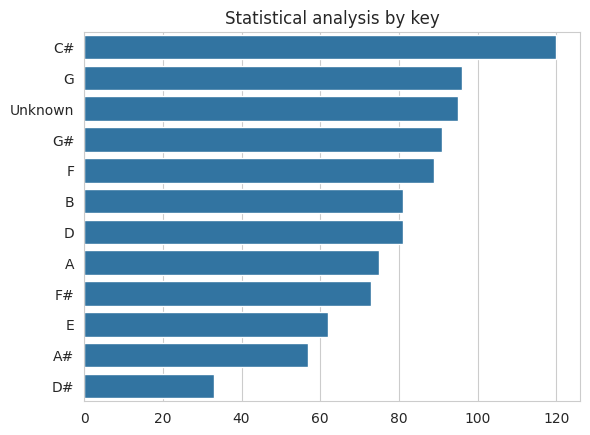

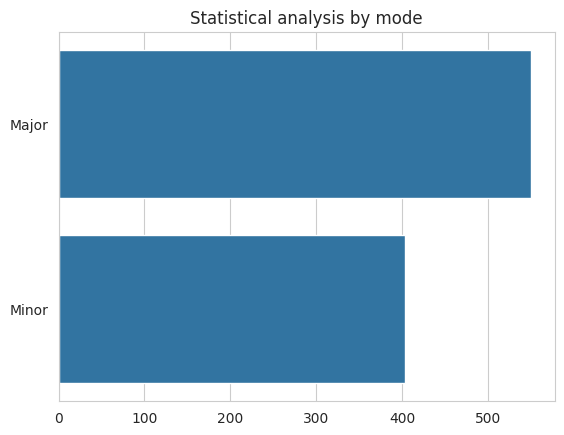

In [227]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

Most of the songs on the chart are written in C# Major.

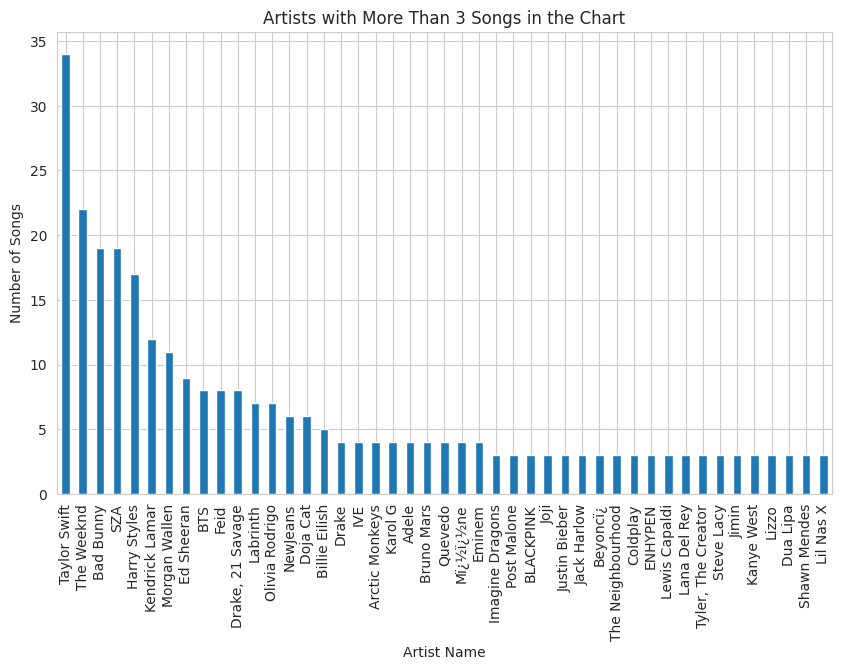

In [228]:
artist_counts = dataset['artist(s)_name'].value_counts()
# Оставляем только тех артистов, у которых больше 2 песен, так как слишком много тех, у кого только одна песня
filtered_artists = artist_counts[artist_counts >= 3]
plt.figure(figsize=(10, 6))
filtered_artists.plot(kind='bar')
plt.title('Artists with More Than 3 Songs in the Chart')
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.xticks(rotation=90)
plt.show()

This was done just for clarity.

Pie Chart - Analysis of relative frequencies

In [229]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

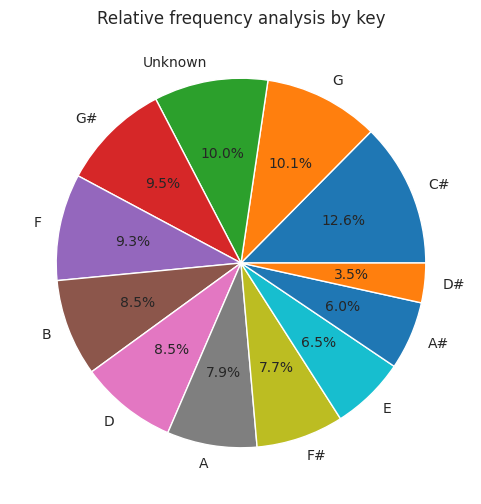

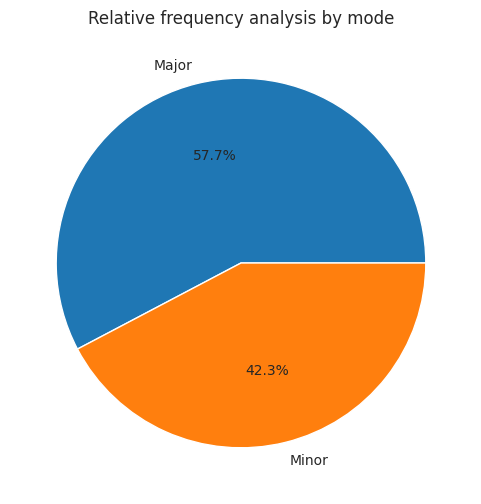

In [230]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

As you can see from the diagrams, the percentage ratio is almost equal.

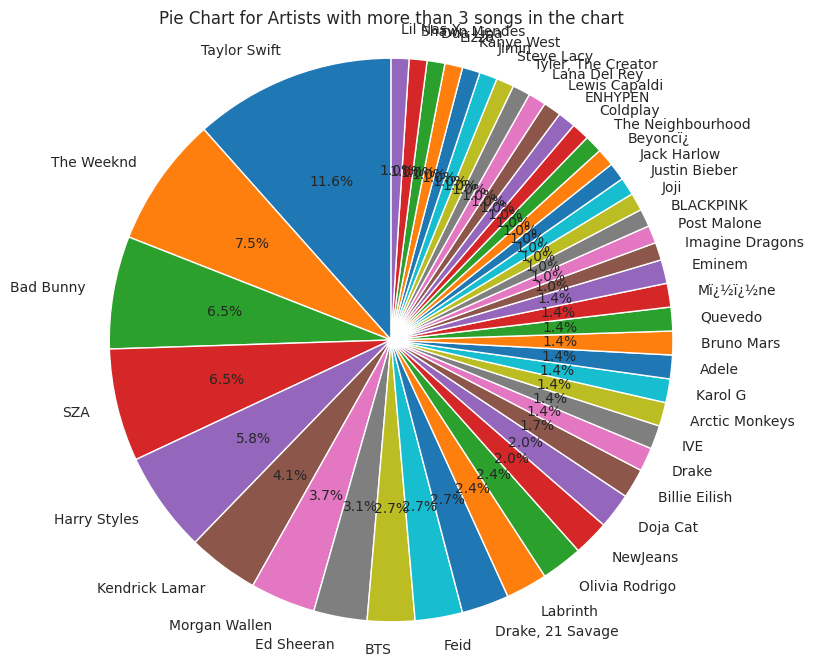

In [231]:
plt.figure(figsize=(8, 8))
plt.pie(filtered_artists, labels=filtered_artists.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for Artists with more than 3 songs in the chart')
plt.axis('equal')
plt.show()

This was done just for clarity.

Statistical Analysis for subgroups

In [232]:
grouped_data = dataset.groupby(['key', 'mode']).size().reset_index(name='count')
print(grouped_data)

        key   mode  count
0         A  Major     42
1         A  Minor     33
2        A#  Major     27
3        A#  Minor     30
4         B  Major     35
5         B  Minor     46
6        C#  Major     73
7        C#  Minor     47
8         D  Major     66
9         D  Minor     15
10       D#  Major     12
11       D#  Minor     21
12        E  Major     17
13        E  Minor     45
14        F  Major     44
15        F  Minor     45
16       F#  Major     30
17       F#  Minor     43
18        G  Major     66
19        G  Minor     30
20       G#  Major     63
21       G#  Minor     28
22  Unknown  Major     75
23  Unknown  Minor     20


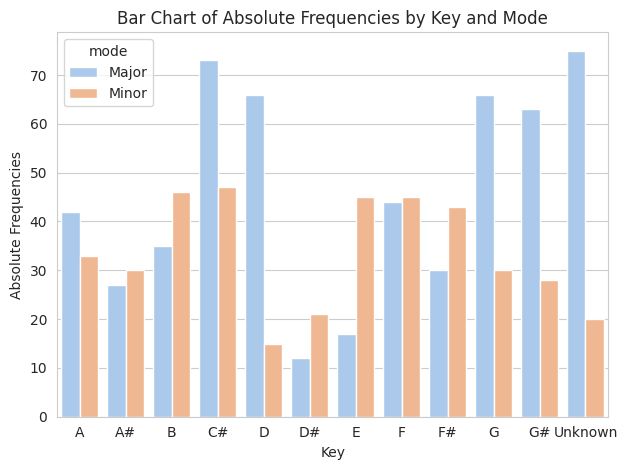

In [233]:
def plot_absfreq_groups(data, g1, g2):
    group = data.groupby([g1, g2]).size().reset_index(name="samples")
    sbn.barplot(data=group, x=g1, y="samples", hue=g2, palette="pastel")
    plt.xlabel(g1.capitalize())
    plt.ylabel('Absolute Frequencies')
    plt.title(f'Bar Chart of Absolute Frequencies by {g1.capitalize()} and {g2.capitalize()}')
    plt.tight_layout()
    plt.show()
plot_absfreq_groups(dataset, 'key', 'mode')


From this we can draw an interesting conclusion that all the songs where the key is not defined (Unknown) are recorded mainly in a major.

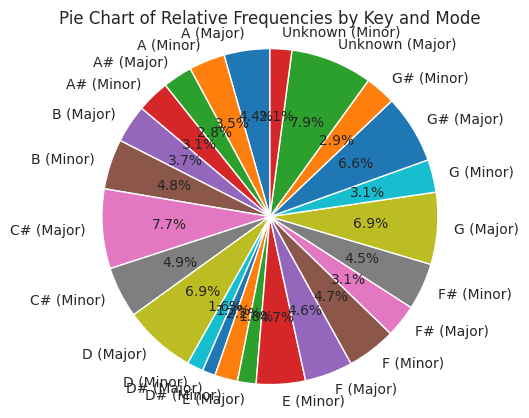

In [234]:
def plot_relfreq_groups(data, g1, g2):
    group = data.groupby([g1, g2]).size().reset_index(name="samples")
    total_samples = group["samples"].sum()
    group["relative_freq"] = group["samples"] / total_samples * 100
    labels = group[g1] + " (" + group[g2] + ")"
    sizes = group["relative_freq"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Pie Chart of Relative Frequencies by {g1.capitalize()} and {g2.capitalize()}')
    plt.show()

plot_relfreq_groups(dataset, 'key', 'mode')

Most of the songs are in C# and G.